In [2]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

---
#### P2b: Directional Derivatives

---
<div class="alert alert-info">
<p>
University of Applied Sciences Munich<br>
Dept of Electrical Enineering and Information Technology<br>
Institute for Applications of Machine Learning and Intelligent Systems (IAMLIS)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(c) Alfred Schöttl 2023<br>
</p>
</div>

In this notebook, we will compute the directional derivatives of images.

In [3]:
fn = '../imgs/wheatgray.jpg'

### 1. Read in the file and rescale to 0..1
Read in the file as grayscale image (with option `cv2.IMREAD_GRAYSCALE`). Rescale the data to 0..1 and save the image as `img`.

In [4]:
img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE) / 255.0

### 2. Compute and display the gradients in x- and y-direction.
Create two 3x3 matrices `sobel_x` and `sobel_y` as ordinary numpy arrays. Use the filter2D command you already know to perform the two filters to our `img`. Save the results in `dimg_x` and `dimg_y`. Observe that these results may contain negative values!

_Tip_: It is sufficient to type in one of the matrices. The other matrix may be computed from the first (how?).

In [5]:
sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
dimg_x = cv2.filter2D(img, -1, sobelx)
dimg_y = cv2.filter2D(img, -1, sobely)

Plot the gradient images. We use another color map here with blueish colors for negative values and redish colors for positive values. You may adjust the arguments `vmin` and `vmax`, which specify the minimum and maximum value which is assigned to the first and the last color of the color map (smaller and greater values are clipped).

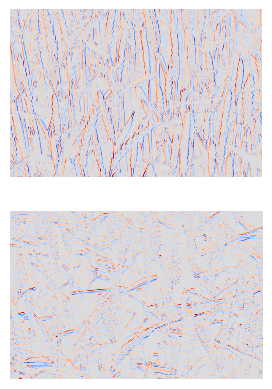

In [6]:
plt.figure('Gradients')
plt.subplot(2,1,1)
plt.imshow(dimg_x, cmap='coolwarm', vmin=-1, vmax=1)
plt.axis(False)
plt.subplot(2,1,2)
plt.imshow(dimg_y, cmap='coolwarm', vmin=-1, vmax=1)
plt.axis(False)
plt.show()

### 3. Compute directional derivatives.
The following code is an animation which demonstrates how the derivatives in various directions look like (you do not need to understand the plotting stuff here). The direction vector is `u`, computed as 
$$u=\left(\array{\cos\varphi\\\sin\varphi}\right)$$
for varying angles $\varphi$ (see line 12). Complete the missing part of line 13 to compute the directional derivative in $u$-direction and save the result in `edges`.

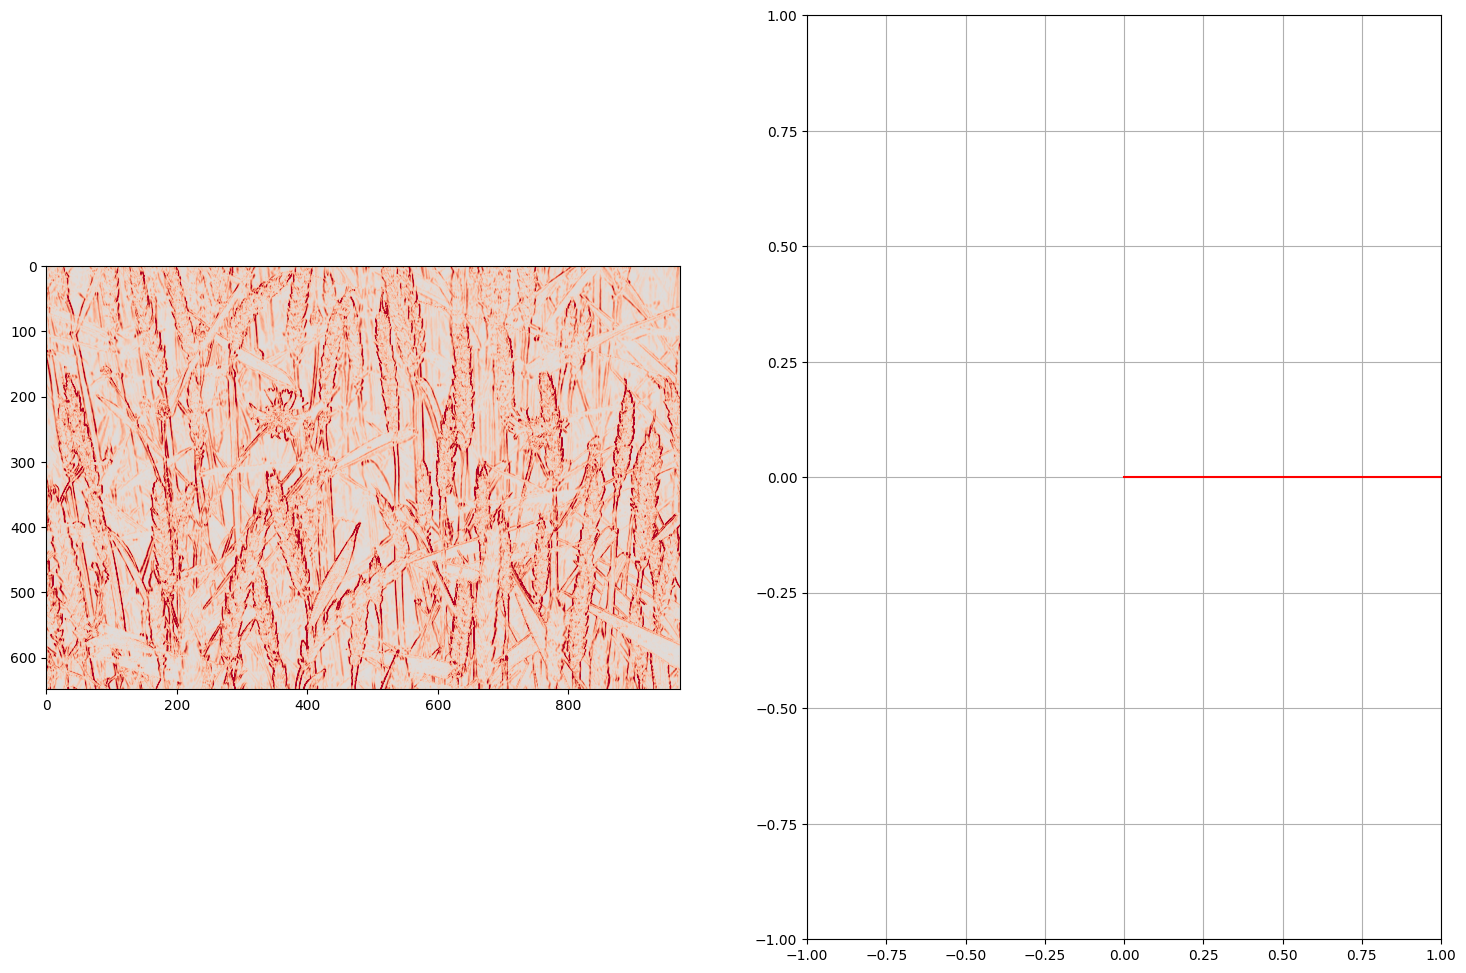

In [9]:
plt.figure('Directional derivatives', figsize=(18,12))
ax1 = plt.subplot(1,2,1)
edge_img = ax1.imshow(dimg_x, cmap='coolwarm', vmin=-1, vmax=1)
ax2 = plt.subplot(1,2,2)
line, = ax2.plot([0, 0], [0, 1], 'r')
ax2.set_xlim(-1.0, 1.0)
ax2.set_ylim(-1.0, 1.0)
ax2.grid()

for phi in np.linspace(0, 4*np.pi, 144):        
    u = [np.cos(phi), np.sin(phi)]
    #
    # create the edge image here
    # 
    edges = np.abs(dimg_x * u[0] + dimg_y * u[1])
    line.set_data([0, u[0]], [0, u[1]])
    edge_img.set_data(edges)
    plt.gcf().canvas.draw()
    plt.gcf().canvas.flush_events()